# **Exploratory Data Analysis (Car Price Prediction)**


## 1. Importing Necessary Libraries

In [1]:
#importing for mathematical computation
import numpy as np 
import pandas as pd
import scipy.stats as stats
#importing for data visualization
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

## 2. Loading The Data

In [2]:
# Loading the dataset
df = pd.read_csv("../dataset/cars_ds_final.csv")

### Fixing Anomalies

In [3]:
# Create a copy of the dataframe
df_copy = df.copy()

# Convert prices to string format and remove "Rs." and commas
df_copy['Ex-Showroom_Price'] = df_copy['Ex-Showroom_Price'].str.replace(',', '').str.replace('Rs. ', '')

# Convert prices to integer type
df_copy['Ex-Showroom_Price'] = df_copy['Ex-Showroom_Price'].astype(int)

# Update the existing dataframe with the modified prices
df['Ex-Showroom_Price'] = df_copy['Ex-Showroom_Price']

# Save the updated dataframe to a new CSV file
df_copy.to_csv('cars_ds_price.csv', index=False)

## 3. Exploring the Data

In [4]:
# Display the first few rows of the dataset
print(df.head())

   Sl_no  Make      Model  Variant  Ex-Showroom_Price Displacement  Cylinders  \
0    NaN  Tata  Nano Genx       Xt             292667       624 cc        2.0   
1    1.0  Tata  Nano Genx       Xe             236447       624 cc        2.0   
2    2.0  Tata  Nano Genx  Emax Xm             296661       624 cc        2.0   
3    3.0  Tata  Nano Genx      Xta             334768       624 cc        2.0   
4    4.0  Tata  Nano Genx       Xm             272223       624 cc        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  ...  \
0                  2.0  RWD (Rear Wheel Drive)                In-line  ...   
1                  2.0  RWD (Rear Wheel Drive)                In-line  ...   
2                  2.0  RWD (Rear Wheel Drive)                In-line  ...   
3                  2.0  RWD (Rear Wheel Drive)                In-line  ...   
4                  2.0  RWD (Rear Wheel Drive)                In-line  ...   

  Leather_Wrapped_Steering Automatic_Headlam

In [5]:
# Check the dimensions of the dataset
print(df.shape)

(1276, 141)


In [7]:
# Summarize basic statistics
description = df.drop('Sl_no', axis=1).describe()
print(description)

       Ex-Showroom_Price    Cylinders  Valves_Per_Cylinder        Doors  \
count       1.276000e+03  1210.000000          1174.000000  1272.000000   
mean        4.596538e+06     4.380992             3.977853     4.550314   
std         1.214735e+07     1.660957             0.833763     0.747816   
min         2.364470e+05     2.000000             1.000000     2.000000   
25%         7.438760e+05     4.000000             4.000000     4.000000   
50%         1.060064e+06     4.000000             4.000000     5.000000   
75%         2.979828e+06     4.000000             4.000000     5.000000   
max         2.121554e+08    16.000000            16.000000     5.000000   

       Seating_Capacity  Number_of_Airbags  USB_Ports  
count       1270.000000        1141.000000  29.000000  
mean           5.270079           3.787029   1.793103  
std            1.145231           2.522399   0.773642  
min            2.000000           1.000000   1.000000  
25%            5.000000           2.000000  

In [8]:
# Check the data types of each column
print(df.dtypes)

Sl_no                float64
Make                  object
Model                 object
Variant               object
Ex-Showroom_Price      int32
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 141, dtype: object


In [9]:
# Identify missing values
print(df.isnull().sum())

Sl_no                   1
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64


In [10]:
# Display the column names
print(df.columns)

Index(['Sl_no', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)


In [13]:
# Explore categorical columns
print("Unique values in categorical columns:\n")
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(column, ":", df[column].nunique())
print()

Unique values in categorical columns:

Make : 39
Model : 263
Variant : 1064
Displacement : 129
Drivetrain : 4
Cylinder_Configuration : 4
Emission_Norm : 4
Engine_Location : 7
Fuel_System : 2
Fuel_Tank_Capacity : 63
Fuel_Type : 6
Height : 211
Length : 228
Width : 182
Body_Type : 17
City_Mileage : 164
Highway_Mileage : 136
ARAI_Certified_Mileage : 281
ARAI_Certified_Mileage_for_CNG : 16
Kerb_Weight : 336
Gears : 8
Ground_Clearance : 73
Front_Brakes : 3
Rear_Brakes : 3
Front_Suspension : 140
Rear_Suspension : 173
Front_Track : 99
Rear_Track : 105
Front_Tyre_&_Rim : 234
Rear_Tyre_&_Rim : 241
Power_Steering : 5
Power_Windows : 2
Power_Seats : 3
Keyless_Entry : 5
Power : 372
Torque : 342
Odometer : 4
Speedometer : 5
Tachometer : 7
Tripmeter : 4
Seats_Material : 4
Type : 5
Wheelbase : 153
Wheels_Size : 209
Start_/_Stop_Button : 1
12v_Power_Outlet : 5
Audiosystem : 8
Aux-in_Compatibility : 1
Average_Fuel_Consumption : 1
Basic_Warranty : 28
Bluetooth : 1
Boot-lid_Opener : 12
Boot_Space : 138
CD

## 4. Visualising the Data

Visualizing the distribution of numerical columns (excluding 'Sl_no'):


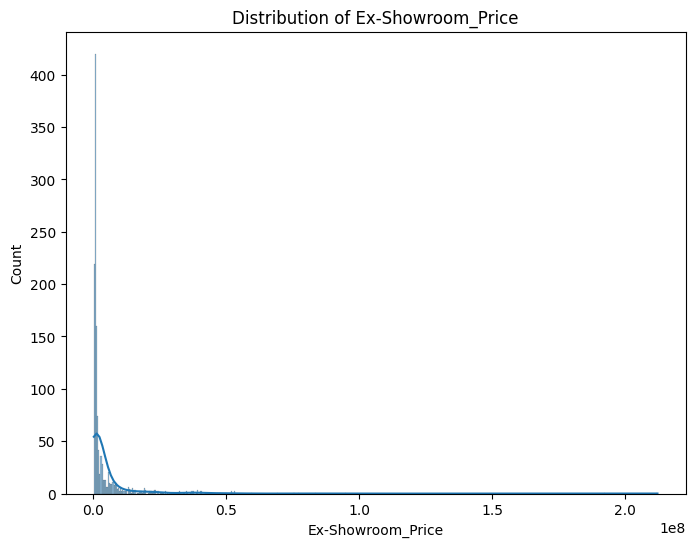

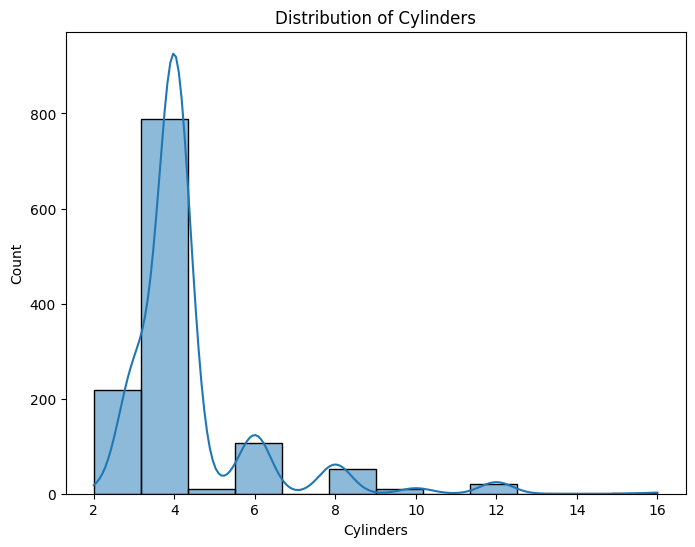

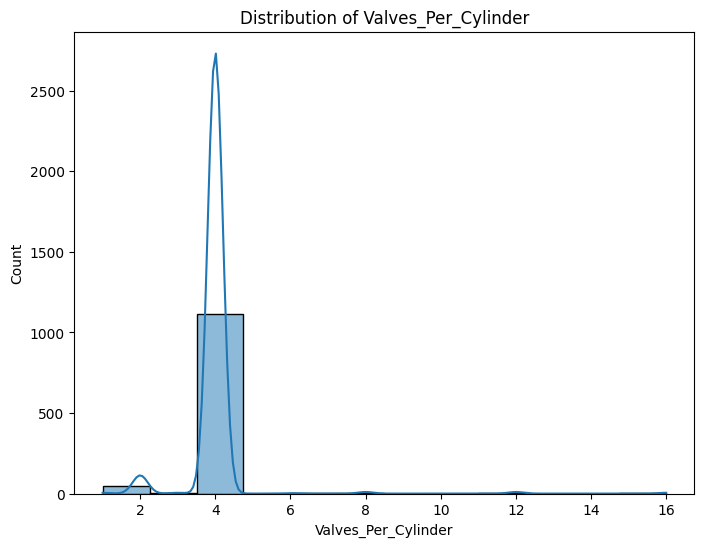

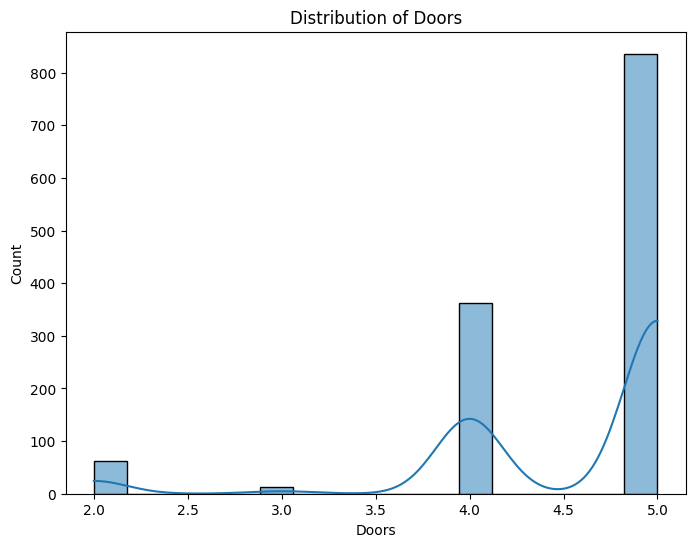

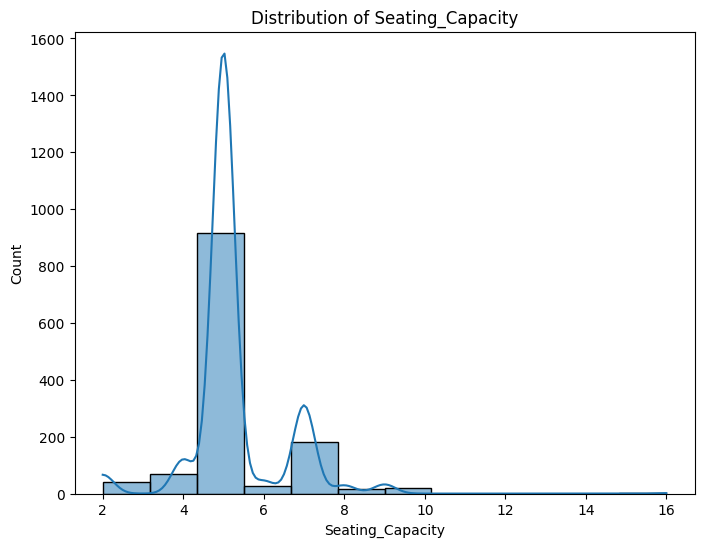

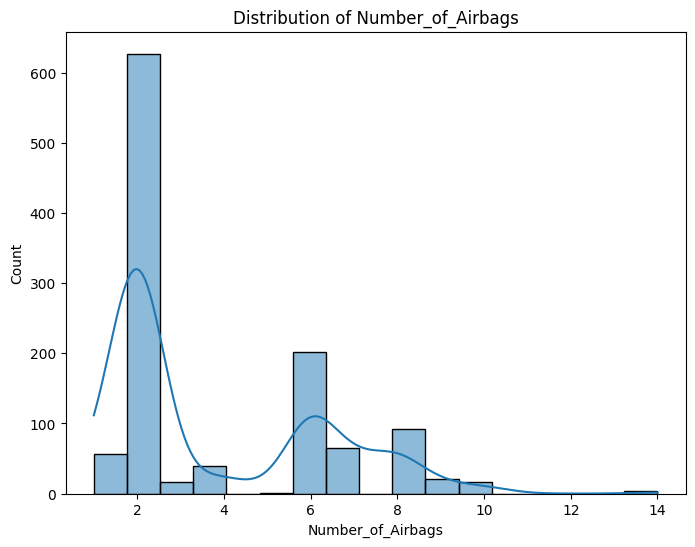

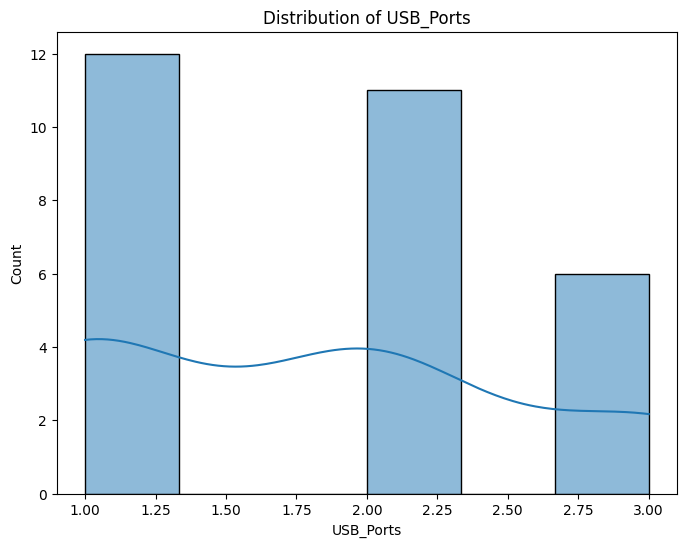

In [14]:
# Visualize the distribution of numerical columns excluding 'Sl_no'
print("Visualizing the distribution of numerical columns (excluding 'Sl_no'):")
numerical_columns = df.select_dtypes(include=['int32','int64', 'float64']).columns.drop('Sl_no')
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

Relationship between numerical columns and the target variable:


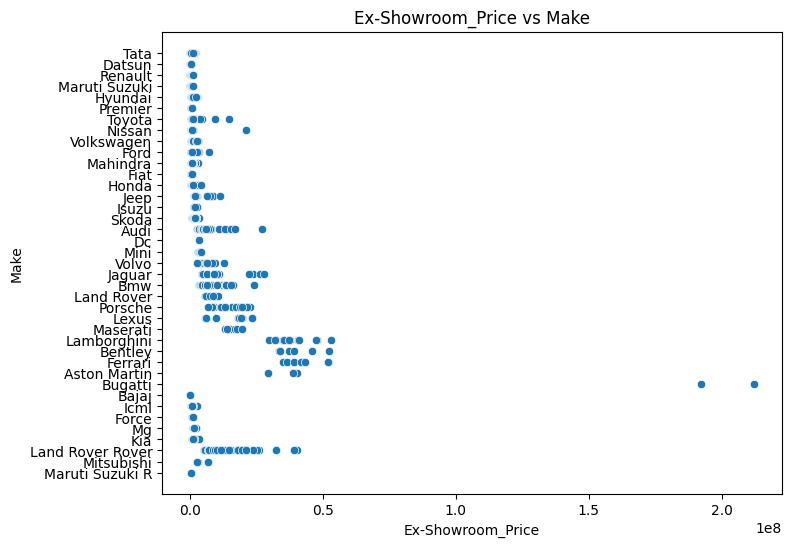

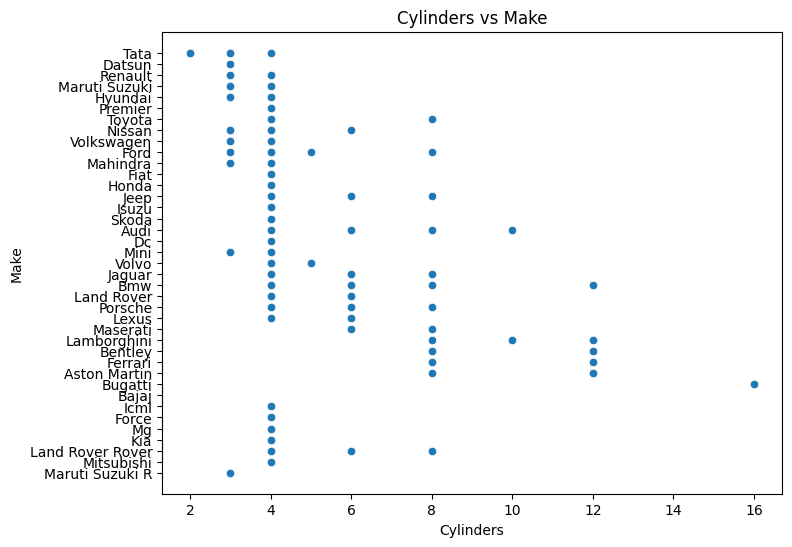

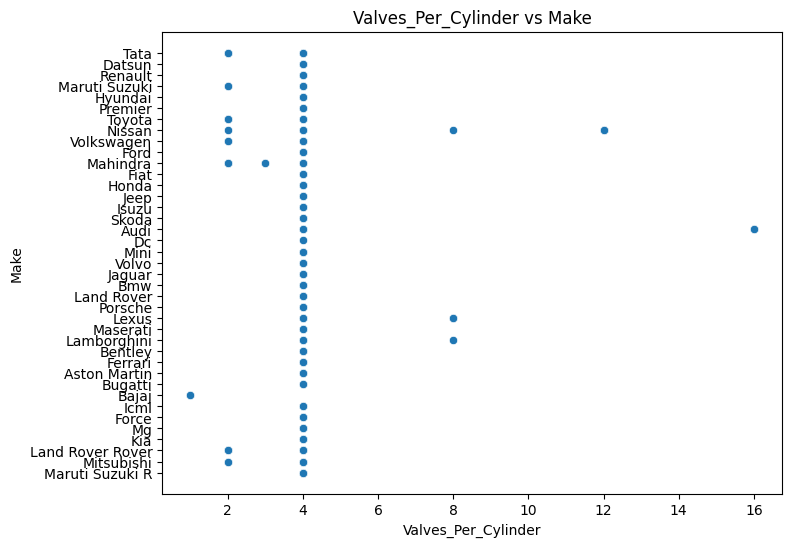

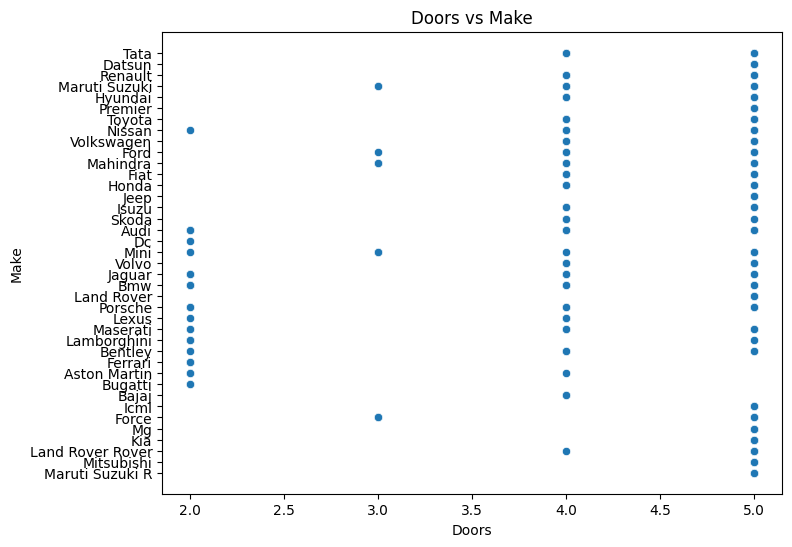

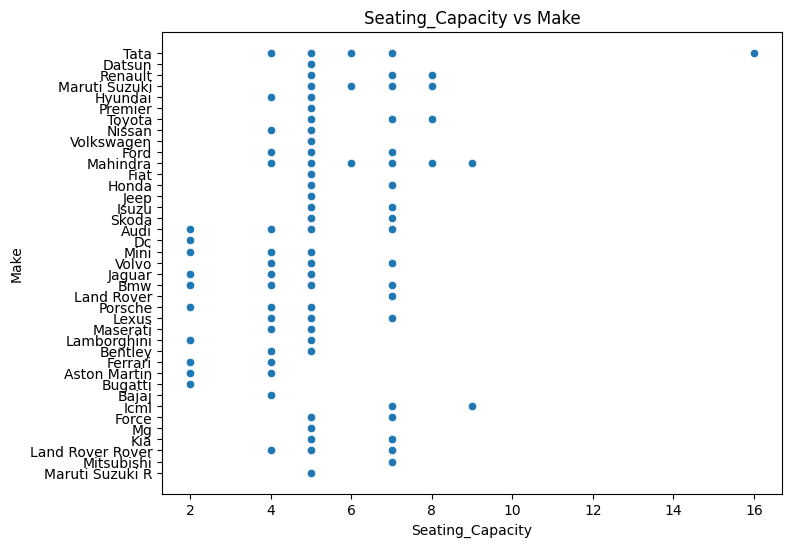

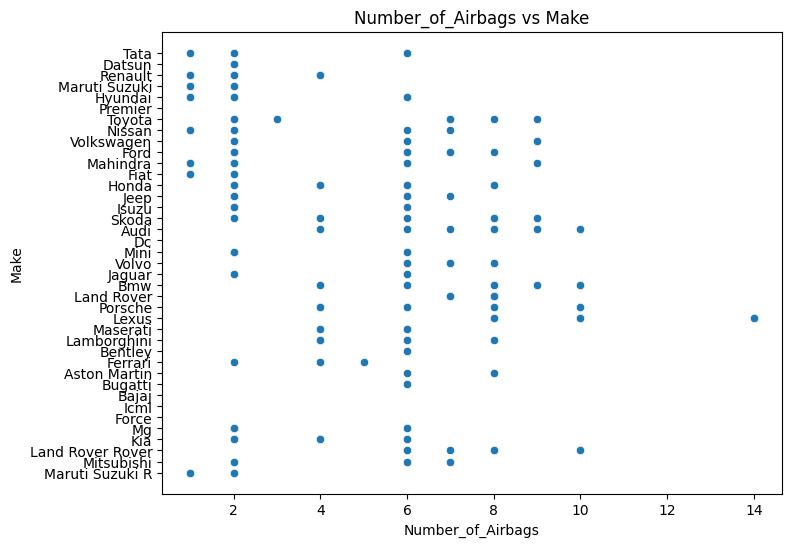

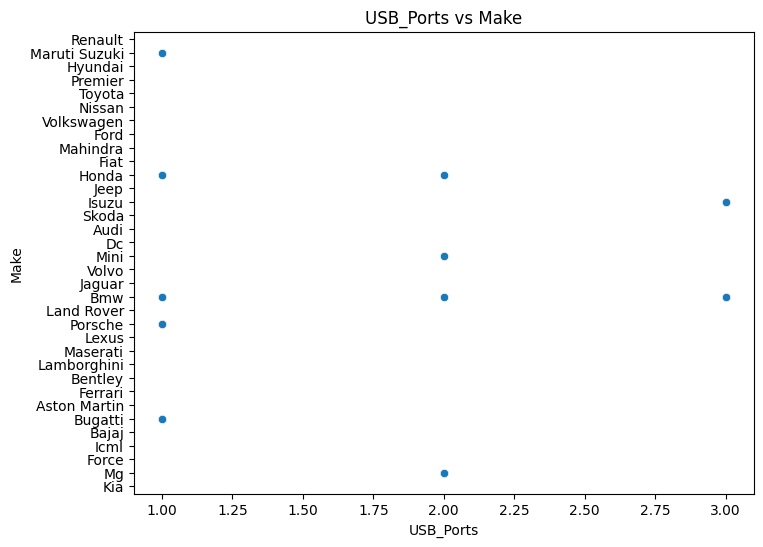

In [15]:
# Visualize the relationship between numerical columns and the target variable
target_column = 'Make'
print("Relationship between numerical columns and the target variable:")
for column in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=column, y=target_column)
    plt.title(f"{column} vs {target_column}")
    plt.show()

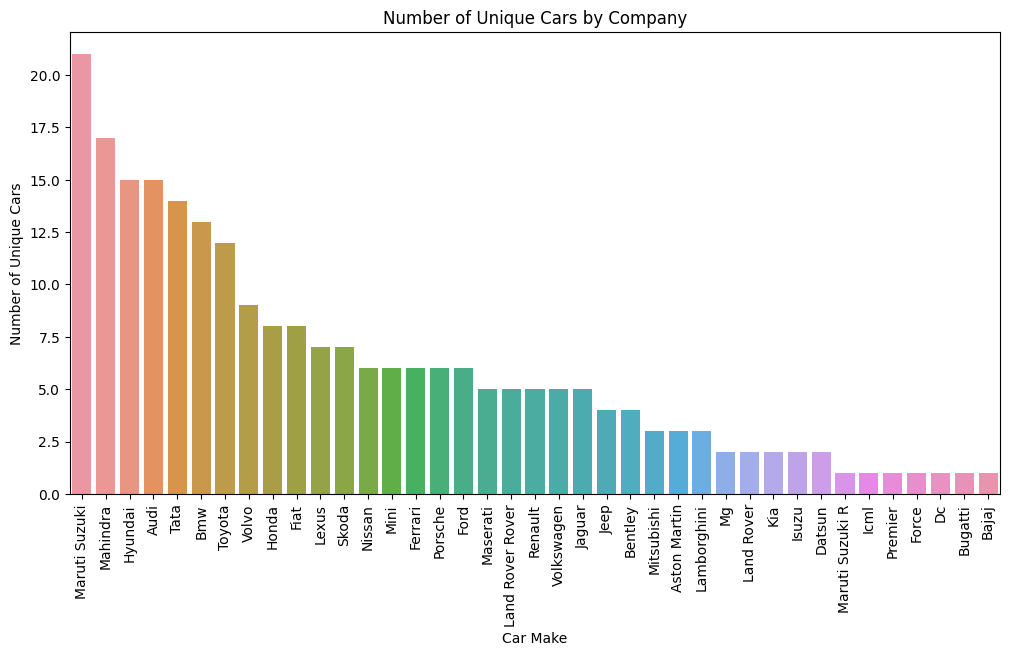

In [16]:
# Calculate the count of unique cars made by each company
unique_cars_by_company = df.groupby('Make')['Model'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=unique_cars_by_company.index, y=unique_cars_by_company.values)
plt.title("Number of Unique Cars by Company")
plt.xlabel("Car Make")
plt.ylabel("Number of Unique Cars")
plt.xticks(rotation=90)
plt.show()

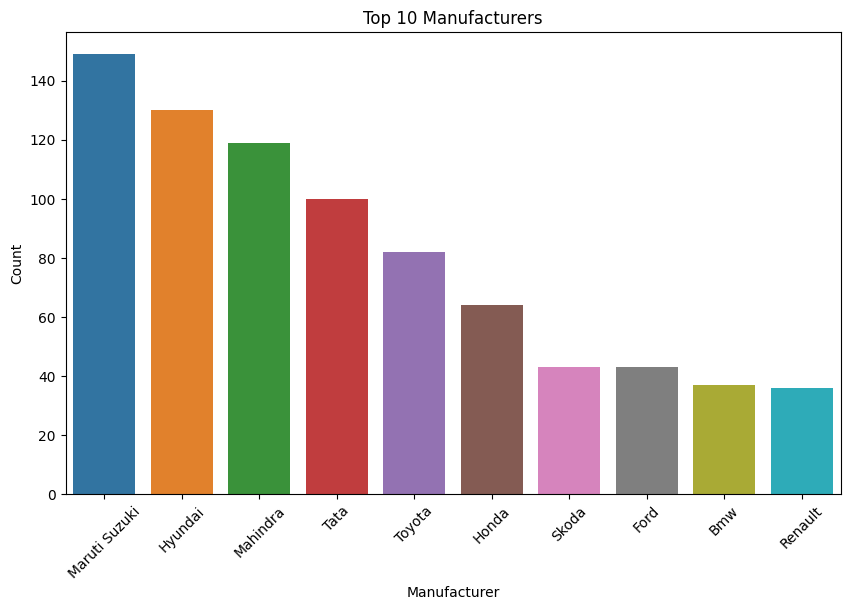

In [19]:
# Visualize the top manufacturers
top_manufacturers = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values)
plt.title("Top 10 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


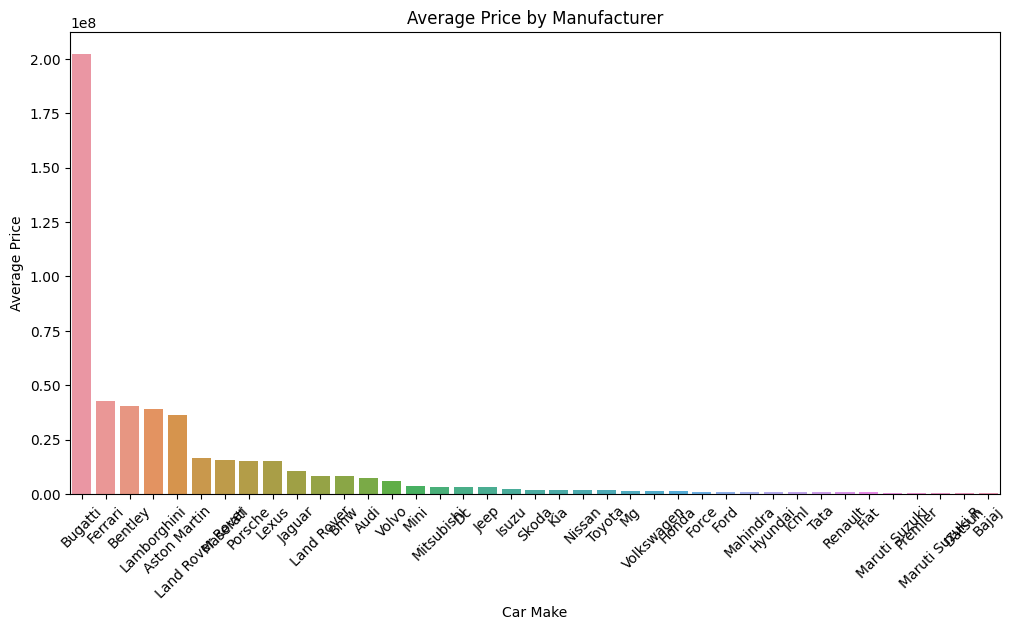

In [20]:
average_price_by_make = df.groupby('Make')['Ex-Showroom_Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_make.index, y=average_price_by_make.values)
plt.title("Average Price by Manufacturer")
plt.xlabel("Car Make")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


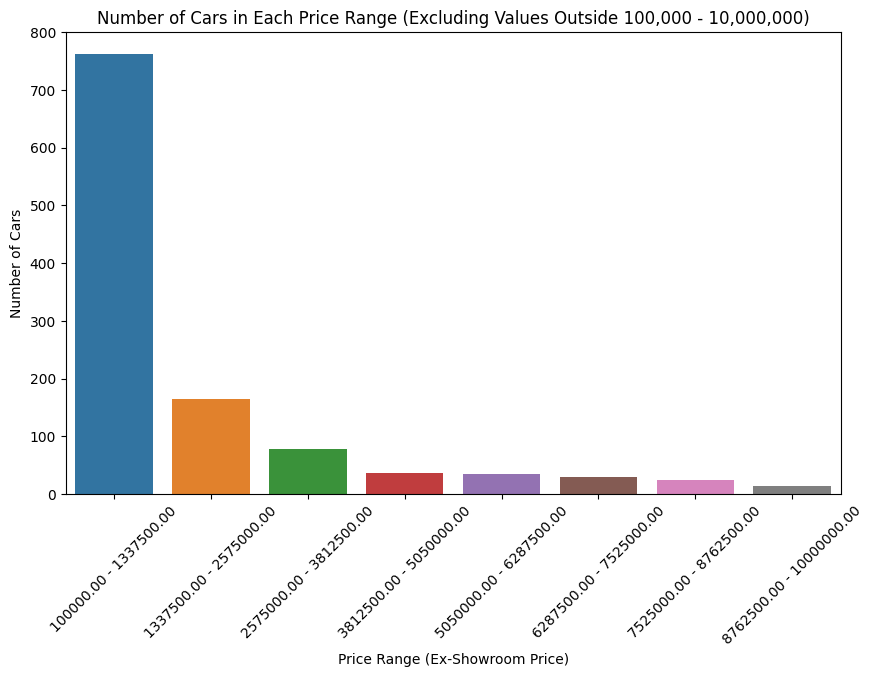

In [21]:
# Define the number of price ranges and calculate the range width
num_ranges = 8
price_range_width = (10000000 - 100000) / num_ranges

# Create bins for the price ranges
bins = [100000 + i * price_range_width for i in range(num_ranges + 1)]
labels = [f'{bins[i]:.2f} - {bins[i+1]:.2f}' for i in range(num_ranges)]

# Filter the dataframe to exclude values outside the specified range
filtered_df = df[(df['Ex-Showroom_Price'] >= 100000) & (df['Ex-Showroom_Price'] <= 10000000)]

# Assign the price ranges to the filtered dataframe
filtered_df['Price_Range'] = pd.cut(filtered_df['Ex-Showroom_Price'], bins=bins, labels=labels, include_lowest=True)

# Count the number of cars in each price range
price_range_counts = filtered_df['Price_Range'].value_counts().sort_index()

# Plot the number of cars in each price range
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.title("Number of Cars in Each Price Range (Excluding Values Outside 100,000 - 10,000,000)")
plt.xlabel("Price Range (Ex-Showroom Price)")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.show()

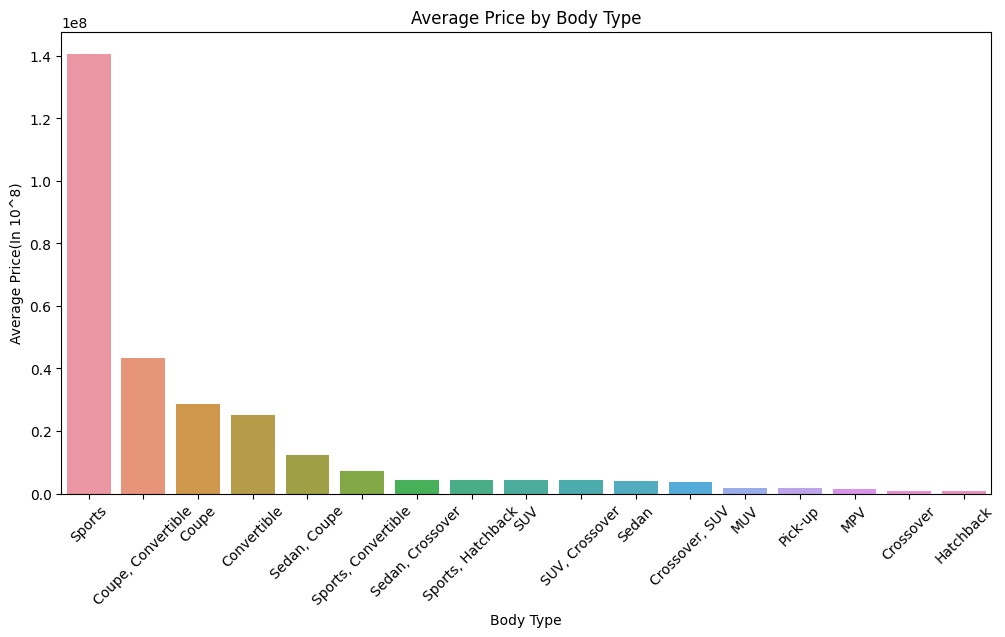

In [22]:
# Visualize the average price by body type
average_price_by_body_type = df.groupby('Body_Type')['Ex-Showroom_Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_body_type.index, y=average_price_by_body_type.values)
plt.title("Average Price by Body Type")
plt.xlabel("Body Type")
plt.ylabel("Average Price(In 10^8)")
plt.xticks(rotation=45)
plt.show()

## 5. Correlation Analysis

Correlation between numerical columns:


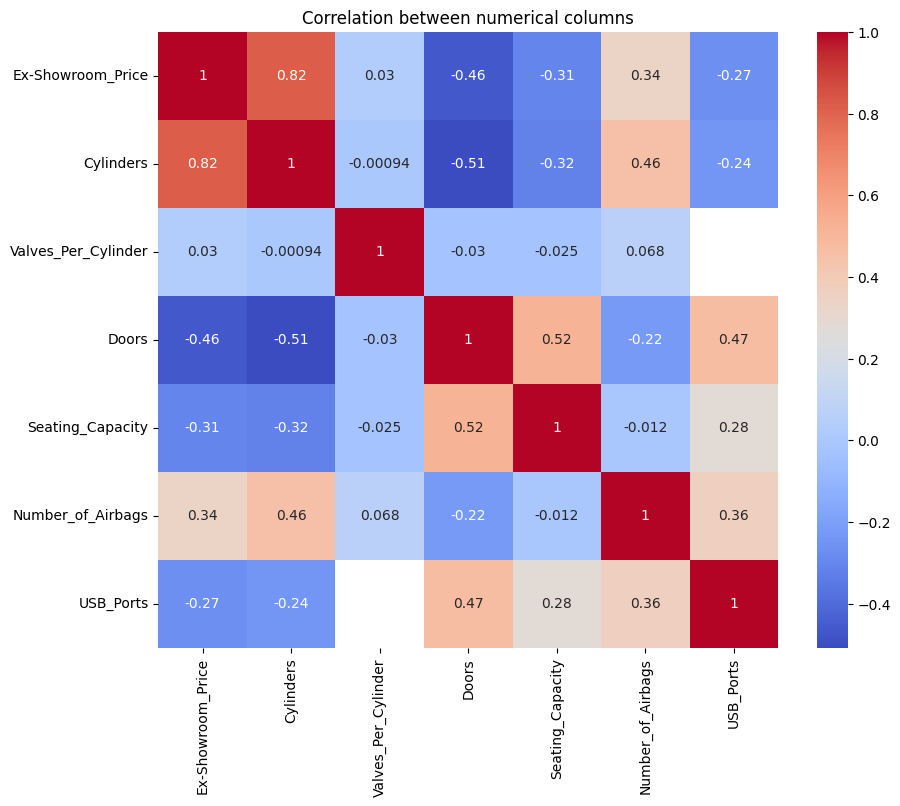

In [23]:
# Visualize the correlation between numerical columns
print("Correlation between numerical columns:")
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between numerical columns")
plt.show()

## Conclusion

In this project, we performed an exploratory data analysis (EDA) on the Indian Cars dataset. We started by loading the dataset and gaining an understanding of its structure and contents. We examined the columns, data types, and basic statistics of the dataset.

During the analysis, we explored various aspects of the dataset including the distribution of numerical columns, the count of unique car makes, the relationship between numerical columns and the target variable (make), and correlation analysis between variables.

Some key insights from the analysis include:

- The dataset consists of cars from various manufacturers, with Tata, Maruti Suzuki, and Hyundai being the most common brands.
- The price range of cars in the dataset varies widely, with some outliers at both the low and high ends.
- There is a positive correlation between certain numerical features such as engine displacement, cylinders, and ex-showroom price.
- Categorical variables such as fuel type, transmission type, and car body type show some level of association with the car make.

Additionally, we visualized the data using various plots and charts to better understand the distributions, relationships, and trends in the dataset.

Overall, this EDA analysis provides valuable insights into the Indian Cars dataset, highlighting important aspects such as the distribution of features, relationships between variables, and patterns within the data. These insights can serve as a foundation for further analysis or machine learning tasks such as car price prediction or classification.

It is important to note that this analysis is based on the available data and the findings are specific to this dataset. Further analysis and validation may be required for more accurate conclusions and predictions.
